In [1]:
import torch
!pip install matplotlib
import matplotlib

In [2]:
import numpy as np
from matplotlib import pyplot as plt

n_trials = 100000 # How many trials to average over
n_tests = 10 # How many examples to try
n=10 # Number of streams
d=4 # Dimension of input
eps=0 #1.529

def softmax(x):
    y = np.exp(x)
    return y/np.sum(y)


In [3]:

# for test in range(10):
#     u = np.random.random((1,1,d)) # Input vector [a,b,c,d]
#     input_spikes = 1.0*(np.random.random((n_trials,n,d))<u) # Get binary spikes based on input
#     I = np.sum(input_spikes,axis=2,keepdims=True) # Get inhibition terms
#     relu=np.maximum(0,1+(input_spikes-eps*I)/n) # Apply activation function step thingy
#     exp = np.prod(relu,axis=1,keepdims=True) # Multiply streams
#     approx = np.mean(exp,axis=0) # Estimate of softmax using this sampling method
#
#     # exact = softmax(u) # Actual softmax
#     exact = np.exp(u) # Actual exponential
#
#     diff = exact - approx # Vector difference
#     print("Error: ",int(100*np.sqrt(np.sum(diff**2)/np.sum(exact**2))),"%")


In [4]:


# n_pop=100
#
# c=2
#
# for trail in range(n_tests):
#     spikes = 1*(n_pop*np.random.random((n_pop,n_trials))<c) # Random spikes with probability (I-a)/n_pop
#     print("Sparsity: ",1-np.mean(spikes))
#     at_least_one_spike = 1*(np.sum(spikes,axis=0)>0) # 1 if there is at least one spike, 0 otherwise
#     # at_least_one_spike = np.maximumnp.sum(spikes,axis=0))
#     # print(at_least_one_spike)
#     no_spikes = 1-at_least_one_spike
#     approx = np.mean(no_spikes)
#     # print(np.mean(no_spikes))
#     # print(np.exp(-c))
#     error = int(100*np.abs(approx*np.exp(c)-1))
#     print("Error: ",error,"%")# n_pop=100
#
# c=2
#
# for trail in range(n_tests):
#     spikes = 1*(n_pop*np.random.random((n_pop,n_trials))<c) # Random spikes with probability (I-a)/n_pop
#     print("Sparsity: ",1-np.mean(spikes))
#     at_least_one_spike = 1*(np.sum(spikes,axis=0)>0) # 1 if there is at least one spike, 0 otherwise
#     # at_least_one_spike = np.maximumnp.sum(spikes,axis=0))
#     # print(at_least_one_spike)
#     no_spikes = 1-at_least_one_spike
#     approx = np.mean(no_spikes)
#     # print(np.mean(no_spikes))
#     # print(np.exp(-c))
#     error = int(100*np.abs(approx*np.exp(c)-1))
#     print("Error: ",error,"%")


0.37084
0.3678794411714424
[[0.01714783 0.04661262 0.93623955]]
[0.         0.03016551 0.96983449]
Times returned no val:  6254 / 10000


'\nThe basic idea is to draw a random K from Poisson(lam) and then do K coin flips, each with success\nprobability p=a/lam. If ALL of the flips are successes, we will call the whole trial a success.\nThen the probability of success is e^{a-lam} or e^{a-a/p}=e^{a(1-1/p)}. We can also roll a dice,\nwith probabilities proportioal to the different possible values, a,b,c,... And then we call it\na success for that value if every roll is that value.\n'

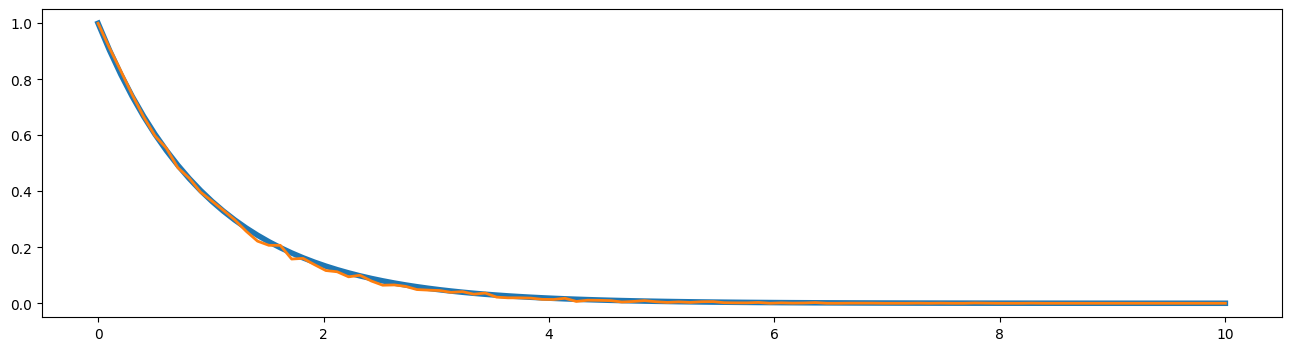

In [13]:
%matplotlib inline
N=50 # Population size
K=2000 # Number of trials
exact_li=[]
approx_li=[]
error_li=[]
C = np.linspace(0,10,100) # Inputs to test
for c in C:
    spikes = 1*(N*np.random.random((N,K))<c) # Random spikes with probability (I-a)/n_pop
    # print("Sparsity: ",int(100*(1-np.mean(spikes))),"%")
    at_least_one_spike = 1*(np.sum(spikes,axis=0)>0) # 1 if there is at least one spike, 0 otherwise
    no_spikes = 1-at_least_one_spike
    approx = np.mean(no_spikes)
    exact = np.exp(-c)
    error = int(100*np.abs(approx/exact-1))
    approx_li.append(approx)
    exact_li.append(exact)
    error_li.append(error)
    # print("Exact exponential: ",exact)
    # print("Approximation: ",approx)
    # print("Error: ",error,"%")

fig,ax=plt.subplots(figsize=(16,4))
ax.plot(C,exact_li,linewidth=4)
ax.plot(C,approx_li,linewidth=2)
plt.show()

In [ ]:

# Works well for single exponential
a=0
lam=a+1
N=100000
K=np.random.poisson(lam=lam,size=N)

probs=np.power(a/lam,K)
approx=np.mean(np.random.random(N)<probs)
print(approx)
exact=np.exp(a-lam)
print(exact)

# Actual softmax?
C=np.array([[1,2,5]])-1
lam=np.sum(C)
N=10000
approx=[0,0,0]
fails=0
K=np.random.poisson(lam=lam,size=N)
for k in K:
    ak=np.random.choice([0,1,2],size=k,p=C[0]/lam)
    if len(np.unique(ak))==1:
        approx[ak[0]]+=1
    else:
        fails+=1
print(softmax(C))
print(approx/np.sum(approx))
print("Times returned no val: ",fails,"/",N)


In [ ]:

# Works well for single exponential
a=0
lam=a+1
N=100000
K=np.random.poisson(lam=lam,size=N)

probs=np.power(a/lam,K)
approx=np.mean(np.random.random(N)<probs)
print(approx)
exact=np.exp(a-lam)
print(exact)

# Actual softmax?
C=np.array([[1,2,5]])-1
lam=np.sum(C)
N=10000
approx=[0,0,0]
fails=0
K=np.random.poisson(lam=lam,size=N)
for k in K:
    ak=np.random.choice([0,1,2],size=k,p=C[0]/lam)
    if len(np.unique(ak))==1:
        approx[ak[0]]+=1
    else:
        fails+=1
print(softmax(C))
print(approx/np.sum(approx))
print("Times returned no val: ",fails,"/",N)



The basic idea is to draw a random K from Poisson(lam) and then do K coin flips, each with success
probability p=a/lam. If ALL of the flips are successes, we will call the whole trial a success.
Then the probability of success is e^{a-lam} or e^{a-a/p}=e^{a(1-1/p)}. We can also roll a dice,
with probabilities proportioal to the different possible values, a,b,c,... And then we call it
a success for that value if every roll is that values



In [11]:


N=5000 # Population size
K=10000 # Number of trials
c = [1,2,3,5,0] # Inputs to softmax
p = np.array(c+[N])
p = p/np.sum(p)
approx=[0]*len(c)
idx = [i for i in range(len(p))]
for t in range(K):
    x = np.random.choice(idx,size=N,p=p)
    y = [a for a in idx if not a in x]
    for j in y:
        approx[j]+=1

approx = np.array(approx)
approx = approx/np.sum(approx)

print(approx)
print(softmax(-np.array(c)))


[0.23444608 0.0861152  0.03466393 0.00403665 0.64073813]
[0.2358595  0.08676786 0.03192011 0.00431992 0.6411326 ]


$$\omega$$